In [1]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
from skimage.filters import threshold_otsu
import cv2
from scipy import ndimage

In [3]:
img = io.imread("Scratch0.jpg", as_gray=True)

We are using varince but it is not a very good for segmentetion

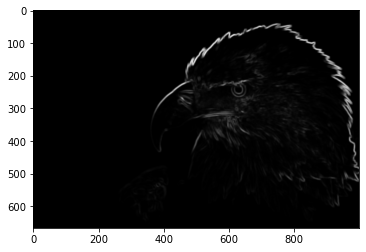

In [4]:
k=7
img_mean = ndimage.uniform_filter(img, (k, k))
img_sqr_mean = ndimage.uniform_filter(img**2, (k, k))
img_var = img_sqr_mean - img_mean**2
plt.imshow(img_var, cmap='gray')

Using Garbor filter is very good if we know the exact parameters for generating features

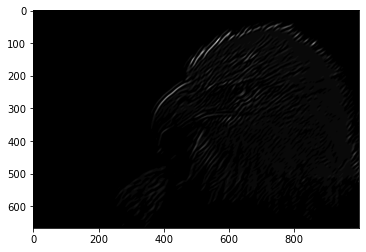

In [5]:
ksize=45
theta=np.pi/4
kernel = cv2.getGaborKernel((ksize, ksize), 5.0, theta, 10.0, 0.9, 0, ktype=cv2.CV_32F)
filtered_image = cv2.filter2D(img, cv2.CV_8UC3, kernel)
plt.imshow(filtered_image, cmap='gray')

Using Entropy

In [6]:
from skimage.filters.rank import entropy
from skimage.morphology import disk

C:\Users\Soumyabrata Paul\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


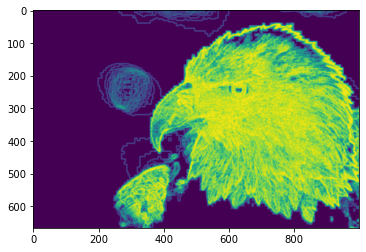

In [7]:
entropy_img = entropy(img, disk(3))
plt.imshow(entropy_img)

Scratch Analysis - single image


Now let us use otsu to threshold high vs low entropy regions.

(array([3.11361e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 8.50400e+03,
        8.30000e+01, 1.35000e+02, 2.03400e+03, 8.33000e+02, 7.71000e+02,
        2.80000e+01, 2.42700e+03, 1.44000e+02, 2.10500e+03, 4.87900e+03,
        2.78700e+03, 1.08500e+03, 2.10800e+03, 2.20800e+03, 9.70800e+03,
        9.66000e+02, 8.48000e+02, 2.24200e+03, 1.31500e+03, 1.25400e+03,
        1.48500e+03, 1.42300e+03, 1.72100e+03, 1.35000e+03, 1.44800e+03,
        1.71700e+03, 1.25400e+03, 8.76000e+02, 1.32700e+03, 1.21000e+03,
        9.08000e+02, 1.21800e+03, 1.08400e+03, 1.05200e+03, 1.09700e+03,
        8.14000e+02, 1.04800e+03, 9.21000e+02, 8.93000e+02, 1.00700e+03,
        1.01800e+03, 1.06300e+03, 1.05700e+03, 1.20200e+03, 1.19500e+03,
        1.21300e+03, 1.26000e+03, 1.34400e+03, 1.41800e+03, 1.43000e+03,
        1.54700e+03, 1.92600e+03, 1.61100e+03, 2.06000e+03, 2.06800e+03,
        2.23600e+03, 2.52300e+03, 2.52700e+03, 2.86700e+03, 3.26000e+03,
        3.29100e+03, 4.23000e+03, 3.60200e+03, 4.53

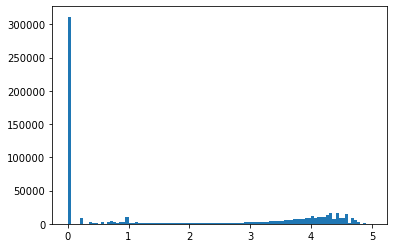

In [8]:
plt.hist(entropy_img.flat, bins=100, range=(0,5))

In [9]:
thresh = threshold_otsu(entropy_img)

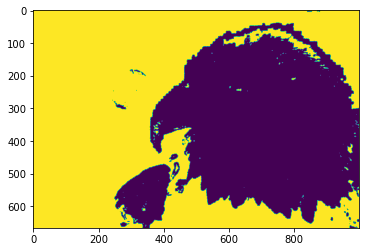

In [11]:
binary = entropy_img <= thresh
plt.imshow(binary)

In [12]:
scratch_area = np.sum(binary == 1)
print("Scratched area is: ", scratch_area, "Square pixels")

Scratched area is:  378047 Square pixels


In [13]:
scale = 0.45 # microns/pixel
print("Scratched area in sq. microns is: ", scratch_area*((scale)**2), "Square pixels")

Scratched area in sq. microns is:  76554.5175 Square pixels
